# Data Acquiring

In [1]:
import zipfile
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [2]:
import os
data_dir = "Alzheimer_s Dataset"
print(os.listdir(data_dir))


['test', 'train']


In [3]:
data_dir += "/train"
#print(data_dir)
x = os.listdir(data_dir+"/MildDemented")
print(len(x))


717


In [6]:
pip install opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 558.9 kB/s eta 0:01:10
    --------------------------------------- 0.5/39.5 MB 558.9 kB/s eta 0:01:10
    --------------------------------------- 0.5/39.5 MB 558.9 kB/s eta 0:01:10
    --------------------------------------- 0.8/39.5 MB 479.2 kB/s eta 0:01:21
    --------------------------------------- 0.8/39.5 MB 479.2 kB/s eta 0:01:21
    --------------------------------------- 0.8/39.5 MB 479.2 kB/s eta 0:01:21
   - -------------------------------------- 1.0/39.5 MB 470.4 kB/s eta 0:01:22
   - --------------------

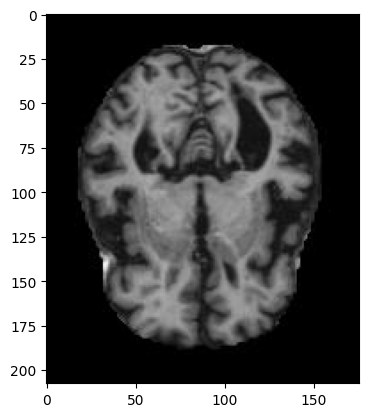

(208, 176, 3)


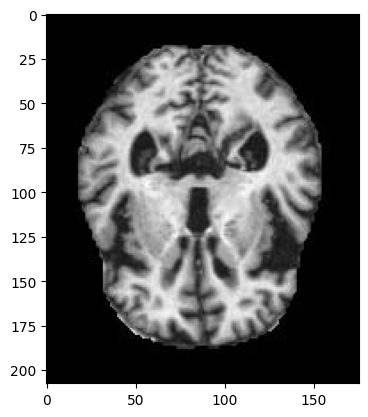

(208, 176, 3)


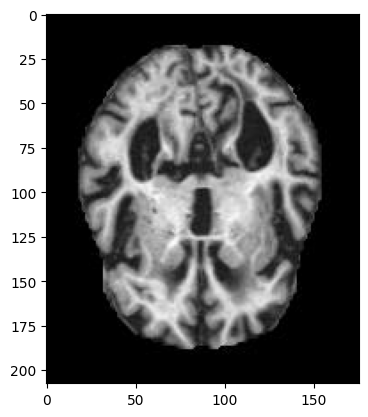

(208, 176, 3)


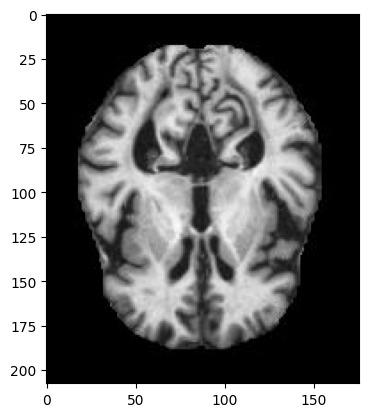

(208, 176, 3)


In [7]:
temp_dir = data_dir + "/MildDemented"

import cv2
import matplotlib.pyplot as plt
i=4
for img in os.listdir(temp_dir):
    img_array = cv2.imread(os.path.join(temp_dir, img))
    #print(img_array)
    plt.imshow(img_array)
    plt.show()
    print(img_array.shape)
    i-=1
    if(i==0):
        break

In [8]:
print(img_array.shape)

(208, 176, 3)


# Data Preprocessing

In [9]:
import tensorflow as tf

In [10]:
# to augment images and create more samples

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.8, 1.2], zoom_range=[0.99, 1.01], horizontal_flip=True, fill_mode="constant", data_format="channels_last")

In [11]:
train_data_gen = image_generator.flow_from_directory(directory=data_dir, target_size=(176, 176), batch_size=5600, shuffle=False)

Found 5121 images belonging to 4 classes.


In [13]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.2 MB ? eta -:--:--
    --------------------------------------- 0.5/41.2 MB 1.2 MB/s eta 0:00:35
    --------------------------------------- 0.8/41.2 MB 1.2 MB/s eta 0:00:33
   - -------------------------------------- 1.0/41.2 MB 1.3 MB/s eta 0:00:32
   - -------------------------------------- 1.3/41.2 MB 1.2 MB/s eta 0:00:34
   - -------------------------------------- 1.6/41.2 MB 1.1 MB/s eta 0:00:36
   - -------------------------------------- 1.6/41.2 MB 1.1 MB/s eta 0:00:36
   - -------------------------------------- 1.8/41.2 MB 1.0 MB/s eta 0:00:38
   -- ------------------------------------- 2.1/41.2 MB 1.0 MB/s eta 0:00:39
   -- ------------------------------------- 2.1/41.2 MB 1.0 MB/s eta 0:00:39
   -- -------------

In [14]:
import numpy as np
from random import randint
import scipy

In [15]:
classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [25]:
def show_images(generator, y_pred=None):
    # Class labels (ensure this matches your dataset)
    classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
    labels = dict(zip([0, 1, 2, 3], classes))
    
    # Get a batch of images
    x, y = next(generator)
    
    # Display grid
    plt.figure(figsize=(10, 10))
    if y_pred is None:
        for i in range(9):
            ax = plt.subplot(3, 3, i+1)
            idx = randint(0, x.shape[0]-1)
            plt.imshow(x[idx].astype('uint8'))
            plt.axis("off")
            # Fixed with proper bracket closure
            plt.title(f"Class: {labels[np.argmax(y[idx])]}")  # Added closing )
    else:
        for i in range(9):
            ax = plt.subplot(3, 3, i+1)
            plt.imshow(x[i].astype('uint8'))
            plt.axis("off")
            # Fixed bracket mismatch
            plt.title(f"Actual: {labels[np.argmax(y[i])]}\nPredicted: {labels[y_pred[i]]}")
    plt.tight_layout()
    plt.show()

In [27]:
# Use Python's built-in next() function
train_data, train_labels = next(train_data_gen)
print(train_data.shape, train_labels.shape)

(5121, 176, 176, 3) (5121, 4)


In [29]:
import os

# Correct base directory (remove duplicate 'train')
data_dir = "Alzheimer_s Dataset/train"  # Should contain class folders directly
classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

for alzheimers_class in classes:
    # Use os.path.join for proper path construction
    class_dir = os.path.join(data_dir, alzheimers_class)
    
    # Verify directory exists
    if not os.path.exists(class_dir):
        print(f"Directory not found: {class_dir}")
        continue
        
    # Count files
    num_files = len(os.listdir(class_dir))
    print(f"{alzheimers_class}: {num_files} images")

MildDemented: 717 images
ModerateDemented: 52 images
NonDemented: 2560 images
VeryMildDemented: 1792 images


The number of data samples for 'ModerateDemented' is considerably low, compared to the other classes. A clear contrast between the sizes of the training classes shows how imbalanced our classes are. So we'll need to perform over-sampling of the data using SMOTE.

In [31]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 985.5 kB/s eta 0:00:11
   - -------------------------------------- 0.5/11.1 MB 985.5 kB/s eta 0:00:11
   -- ------------------------------------- 0.8/11.1 MB 838.9 kB/s eta 0:00:13
   -- ------------------------------------- 0.8/11.1 MB 838.9 kB/s eta 0:00:13
   --- ------------------------------------ 1.0/11.1 MB 739.8 kB/s eta 0:00:14
   --- ------------------------------------ 1.0/11.1 MB 739.8 kB/s eta 0:00:14
   ---- ----------------------------------- 1.3/11.1 MB 7

In [32]:
import imblearn

sm = imblearn.over_sampling.SMOTE(random_state=42)
train_data, train_labels = sm.fit_resample(train_data.reshape(-1, 176 * 176 * 3), train_labels)
train_data = train_data.reshape(-1, 176, 176, 3)
print(train_data.shape, train_labels.shape)

(10240, 176, 176, 3) (10240, 4)


# Model Training

Going to use multiple types of blocks, multiple times. So I'm just going to define functions for each type of blocks and call them later.

### Convolutional Blocks

In [33]:
def conv_block(filters, act='relu'):    
    block = tf.keras.Sequential()
    block.add(tf.keras.layers.Conv2D(filters, 3, activation=act, padding='same'))
    block.add(tf.keras.layers.Conv2D(filters, 3, activation=act, padding='same'))
    block.add(tf.keras.layers.BatchNormalization())
    block.add(tf.keras.layers.MaxPool2D())
    
    return block

### Normalization Blocks

In [34]:
def norm_block(units, dropout_rate, act='relu'):    
    block = tf.keras.Sequential()
    block.add(tf.keras.layers.Dense(units, activation=act))
    block.add(tf.keras.layers.BatchNormalization())
    block.add(tf.keras.layers.Dropout(dropout_rate))
    return block

### Sequential Model

In [35]:
def construct_model(act='relu'):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(*[176, 176], 3)),
        tf.keras.layers.Conv2D(16, 3, activation=act, padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation=act, padding='same'),
        tf.keras.layers.MaxPool2D(),
        conv_block(32),
        conv_block(64),
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        norm_block(512, 0.7),
        norm_block(128, 0.5),
        norm_block(64, 0.3),
        tf.keras.layers.Dense(4, activation='softmax') #Output Layer       
    ], name = "cnn_model")

    return model

### Model Compilation

In [36]:
model = construct_model()

METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc')]
    
model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

model.summary()

Model: "cnn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 176, 176, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 176, 176, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 88, 88, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 44, 44, 32)     │        14,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 22, 22, 64)     │        55,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 11, 11, 128)    │       221,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 5, 5, 256)      │       886,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 512)            │     3,279,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 128)            │        66,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ (None, 64)             │         8,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,534,996 (17.30 MB)

 Trainable params: 4,532,628 (17.29 MB)

 Non-trainable params: 2,368 (9.25 KB)

### Model Training

In [37]:
history = model.fit(train_data, train_labels, epochs=100, validation_split=0.2)

Epoch 1/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 183s 679ms/step - acc: 0.3064 - auc: 0.5704 - loss: 1.7242 - val_acc: 0.3008 - val_auc: 0.6061 - val_loss: 1.6072
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 166s 647ms/step - acc: 0.4245 - auc: 0.6987 - loss: 1.2761 - val_acc: 0.0210 - val_auc: 0.6000 - val_loss: 2.7300
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 171s 666ms/step - acc: 0.5807 - auc: 0.8351 - loss: 0.9586 - val_acc: 0.3442 - val_auc: 0.6813 - val_loss: 2.3232
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 166s 647ms/step - acc: 0.6623 - auc: 0.8956 - loss: 0.7572 - val_acc: 0.6602 - val_auc: 0.9211 - val_loss: 0.8796
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 166s 647ms/step - acc: 0.7075 - auc: 0.9247 - loss: 0.6460 - val_acc: 0.3447 - val_auc: 0.7035 - val_loss: 1.4833
Epoch 6/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 187s 729ms/step - acc: 0.7429 - auc: 0.9386 - loss: 0.5798 - val_acc: 0.7319 - val_auc: 0.9219 - val_loss: 0.6728
Epoch 7/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 178s 696ms/step - acc: 0.7653

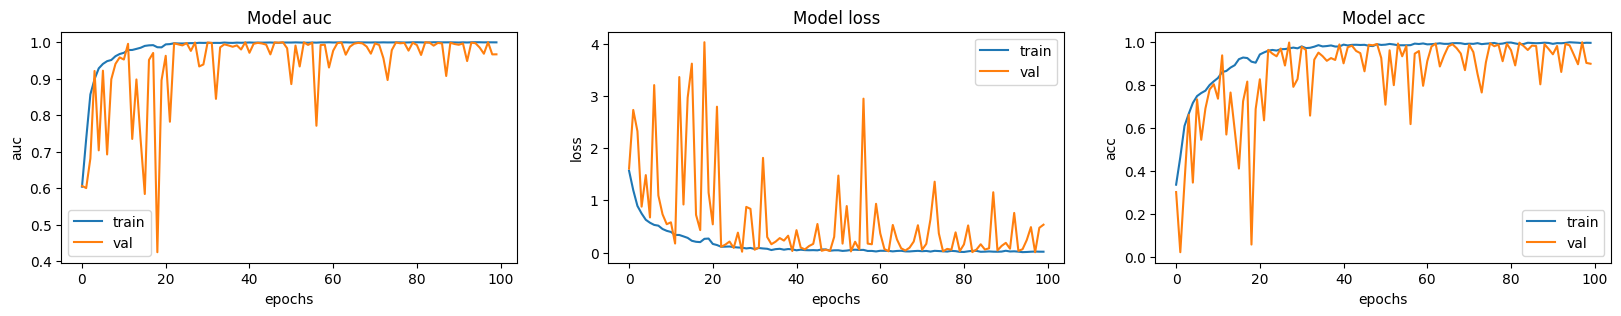

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['auc', 'loss', 'acc']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

### Model Testing

In [39]:
data_dir1 = data_dir[:19]+'/test'
data_dir1

'Alzheimer_s Dataset/test'

In [40]:
test_data_gen = image_generator.flow_from_directory(directory=data_dir1, target_size=(176, 176), batch_size=6500, shuffle=False)

Found 1279 images belonging to 4 classes.


In [42]:
# Use Python's built-in next() function
test_data, test_labels = next(test_data_gen)
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)

Test data shape: (1279, 176, 176, 3)
Test labels shape: (1279, 4)


In [43]:
test_scores = model.evaluate(test_data, test_labels)
test_scores

40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - acc: 0.6619 - auc: 0.8424 - loss: 1.8407


[1.7791204452514648, 0.6184518933296204, 0.8374707698822021]

In [44]:
predicted_test_labels = model.predict(test_data)

40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step


In [ ]:
def roundoff(arr):
    """To round off according to the argmax of each predicted label array. """
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in predicted_test_labels:
    labels = roundoff(labels)

In [46]:
import sklearn

print(sklearn.metrics.classification_report(test_labels, predicted_test_labels, target_names=classes))

                  precision    recall  f1-score   support

    MildDemented       0.45      0.43      0.44       179
ModerateDemented       0.27      0.25      0.26        12
     NonDemented       0.66      0.83      0.73       640
VeryMildDemented       0.62      0.40      0.49       448

       micro avg       0.62      0.62      0.62      1279
       macro avg       0.50      0.48      0.48      1279
    weighted avg       0.61      0.62      0.60      1279
     samples avg       0.62      0.62      0.62      1279



In [48]:
pip install seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl (11.6 MB)
Note: you may need to restart the kernel to use updated packages.


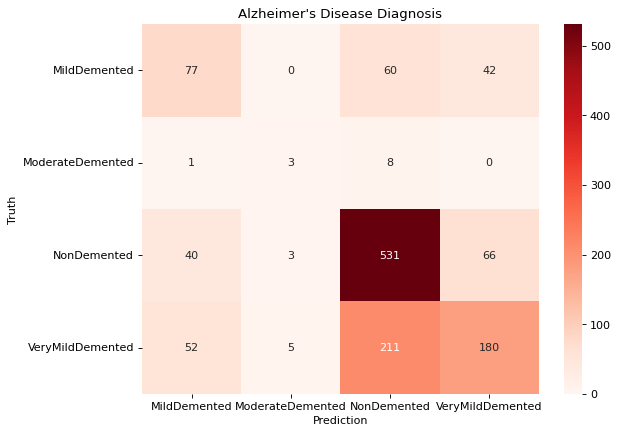

In [49]:
pred_ls = np.argmax(predicted_test_labels, axis=1)
test_ls = np.argmax(test_labels, axis=1)

conf_arr = sklearn.metrics.confusion_matrix(test_ls, pred_ls)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

import seaborn as sns
ax = sns.heatmap(conf_arr, cmap='Reds', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)

plt.title('Alzheimer\'s Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [ ]:
model.save("saved_model.keras")

# Flask App

In [59]:
pip install tensorflow pillow flask

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from flask import Flask, request, render_template
from werkzeug.utils import secure_filename

ASSET_FOLDER = 'static/assets/'

app = Flask(__name__)
app.config['ASSET_FOLDER'] = ASSET_FOLDER

github_icon = os.path.join(app.config['ASSET_FOLDER'], 'github.png')
linkedin_icon = os.path.join(app.config['ASSET_FOLDER'], 'linkedin.png')
instagram_icon = os.path.join(app.config['ASSET_FOLDER'], 'instagram.png')
twitter_icon = os.path.join(app.config['ASSET_FOLDER'], 'twitter.png')
bg_video = os.path.join(app.config['ASSET_FOLDER'], 'pexels-tima-miroshnichenko-6010766.mp4')

classdict = {
    1: "Mild Dementia",
    2: "Moderate Dementia",
    3: "No Dementia, Patient is Safe",
    4: "Very Mild Dementia"
}

@app.route('/')
def upload_form():
    return render_template('index.html', type="", githubicon=github_icon, linkedinicon=linkedin_icon, instagramicon=instagram_icon, twittericon=twitter_icon, bgvideo=bg_video)

@app.route('/', methods=['POST'])
def upload_image():
    file = request.files['file']
    filename = secure_filename(file.filename)
    file.save(os.path.join("static/uploads", filename))

    imvar = tf.keras.preprocessing.image.load_img(os.path.join("static/uploads", filename)).resize((176, 176))
    imarr = tf.keras.preprocessing.image.img_to_array(imvar)
    imarr = np.array([imarr])
    
    model = tf.keras.models.load_model("saved_model.keras")
    impred = model.predict(imarr)

    for classpreds in impred:
        impred = roundoff(classpreds)
    
    classcount = np.argmax(impred) + 1 
    prediction = classdict.get(classcount, "Unknown")

    return render_template('index.html', type="Patient is suffering from " + prediction, githubicon=github_icon, linkedinicon=linkedin_icon, instagramicon=instagram_icon, twittericon=twitter_icon, bgvideo=bg_video)

def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [03/Apr/2025 02:00:19] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Apr/2025 02:00:19] "GET /static/assets/linkedin.png HTTP/1.1" 304 -
127.0.0.1 - - [03/Apr/2025 02:00:19] "GET /static/assets/twitter.png HTTP/1.1" 304 -
127.0.0.1 - - [03/Apr/2025 02:00:19] "GET /static/assets/instagram.png HTTP/1.1" 304 -
127.0.0.1 - - [03/Apr/2025 02:00:19] "GET /static/assets/pexels-tima-miroshnichenko-6010766.mp4 HTTP/1.1" 206 -
127.0.0.1 - - [03/Apr/2025 02:04:34] "GET /static/assets/pexels-tima-miroshnichenko-6010766.mp4 HTTP/1.1" 206 -
127.0.0.1 - - [03/Apr/2025 02:04:44] "GET /static/assets/pexels-tima-miroshnichenko-6010766.mp4 HTTP/1.1" 206 -
127.0.0.1 - - [03/Apr/2025 02:05:29] "GET /static/assets/pexels-tima-miroshnichenko-6010766.mp4 HTTP/1.1" 206 -
